In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

#variables
labels=()
axis=()

In [3]:
#hospitalization data
data_df = pd.read_csv("NEISS.TXT", delimiter = "	")
data_df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,...,Fire_Involvement,Alcohol,Drug,Product_1,Product_2,Product_3,Narrative_1,Stratum,PSU,Weight
0,200113309,01/01/2020,54,1,1,NaN,2,76,59,NaN,...,0,0,0,5022,0,0,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...,L,5,56.2517
1,200113888,01/04/2020,27,1,1,NaN,1,30,71,PAIN,...,0,0,0,5022,0,0,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...,V,40,15.9992
2,200114014,01/03/2020,48,2,1,NaN,2,37,53,NaN,...,0,0,0,5022,0,0,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...,V,61,15.9992
3,200116084,01/06/2020,25,1,1,NaN,2,32,57,NaN,...,0,0,0,5022,0,0,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...,L,69,56.2517
4,200120088,01/07/2020,55,1,0,NaN,0,31,71,PAIN,...,0,0,0,5022,0,0,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...,V,35,15.9992


In [4]:
#Cleaning data by case number to make sure no duplicates were included
data_df.groupby('CPSC_Case_Number').nunique()

,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,...,Fire_Involvement,Alcohol,Drug,Product_1,Product_2,Product_3,Narrative_1,Stratum,PSU,Weight
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
200113309,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
200113888,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
200114014,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
200116084,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
200120088,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210222778,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
210225336,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
210225342,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
#Counting amount of injuries that were alcohol/drug induced
#counts of alcohol induced injuries
alcohol_counts = data_df.Alcohol.value_counts()
alcohol_counts

0    763
1     70
Name: Alcohol, dtype: int64

In [17]:
#Display of injuries caused by alcohol
Alcohol = ["No", "Yes"]
alcohol_distribution = [763, 70]

plt.pie(alcohol_distribution, labels=Alcohol, autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Alcohol Induced Injuries")

plt.show()

In [18]:
##counts of drug induced injuries
drug_counts = data_df.Drug.value_counts()
drug_counts

0    817
1     16
Name: Drug, dtype: int64

<IPython.core.display.Javascript object>


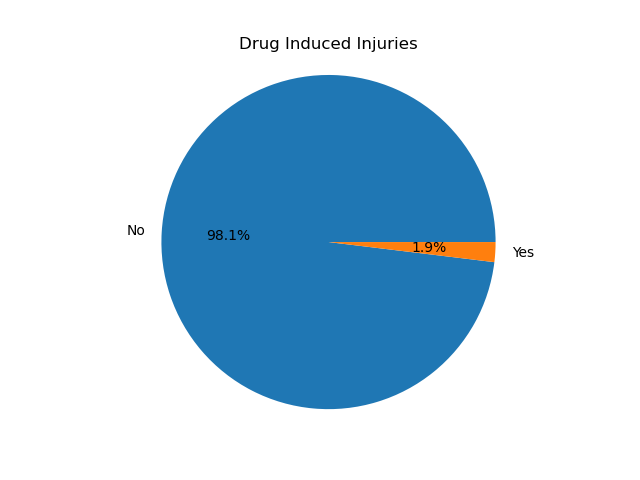

In [19]:
#Display of injuries caused by alcohol
Drug = ["No", "Yes"]
drug_distribution = [817, 16]

plt.pie(drug_distribution, labels=Drug, autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Drug Induced Injuries")

plt.show()